In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import warnings
from sklearn.svm import SVC

warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.drop(['Unnamed: 32','id'], inplace = True, axis = 1)

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'] =  df['diagnosis'].map({'M':1,'B':0})

In [ ]:
df['diagnosis'].unique()

array([1, 0])

In [ ]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis'].values.reshape(-1,1)


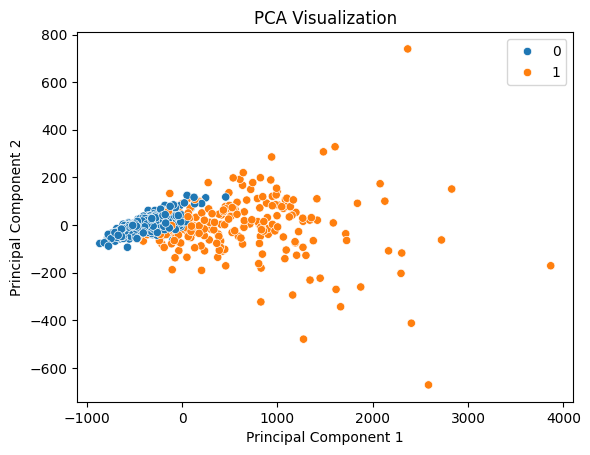

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y.flatten())
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X)

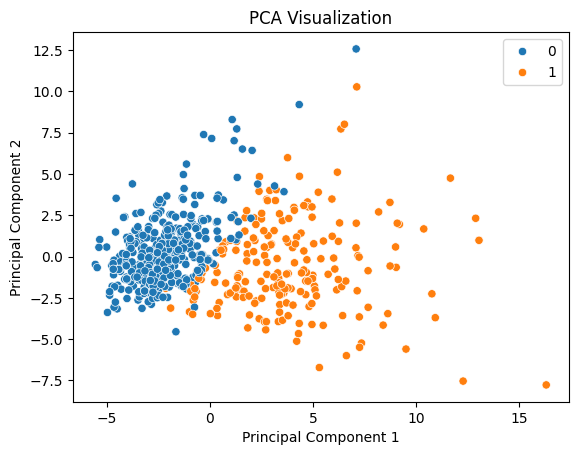

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y.flatten())
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
svc = SVC(random_state=101)

accuracies = cross_val_score(svc,X_train,y_train,cv=5)

print("Train Score:",np.mean(accuracies))


Train Score: 0.9736263736263737


In [ ]:
svc.fit(X_train,y_train)
print("Test Score:",svc.score(X_test,y_test))

Test Score: 0.9736842105263158


In [ ]:
grid = {

    'C':[0.01,0.1,1,10],

    'kernel' : ["linear","poly","rbf","sigmoid"],

    'degree' : [1,3,5,7],

    'gamma' : [0.01,1]

}

svm  = SVC ()

svm_cv = GridSearchCV(svm, grid, cv = 5)

svm_cv.fit(X_train,y_train)

print("Best Parameters:",svm_cv.best_params_)

print("Train Score:",svm_cv.best_score_)

print("Test Score:",svm_cv.score(X_test,y_test))


Best Parameters: {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 0.9758241758241759
Test Score: 0.9824561403508771
